# Objective
**- To classify the given leaf image as healthy, late blight or early blight**<br>
**- Multiclass classification problem**<br>

# Data
**-The dataset is originally collected from
[kaggle.com](https://www.kaggle.com/arjuntejaswi/plant-village)**<br>
**- A subset of the original data is created which includes only the diseases of potato plants**<br>
**- Dataset used in this project -
[click here!](https://www.kaggle.com/ashokkumarpalivela/potato-diseases)**

#### Folder structure
- data
    - Late Blight
        - img1.png
        - img2.png
        - ...
    - Early Blight
        - img1.png
        - img2.png
        - ...
    - Healthy
        - img1.png
        - img2.png
        - ...

# Dependencies

In [1]:
! pip install scikit-learn
! pip install pydot graphviz

In [2]:
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from keras.layers import LeakyReLU
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, roc_curve, auc
from keras.activations import sigmoid
from keras.utils import plot_model

import tensorflow as tf
from keras.preprocessing.image import load_img, img_to_array

print(tf.__version__)
############ settings ############
data_dir = r"../data"

batch_size = 64
img_height = 128
img_width = 128

2.16.0-rc0


# Data preprocessing

**- Loading and splitting data<br>**
**- Train:80% and Validation:20%**

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2153 files belonging to 3 classes.
Using 1723 files for training.
Found 2153 files belonging to 3 classes.
Using 430 files for validation.


# 


2024-05-09 12:59:30.514305: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-05-09 12:59:30.661975: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


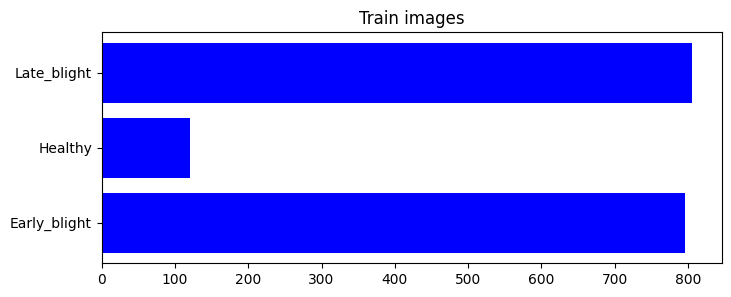

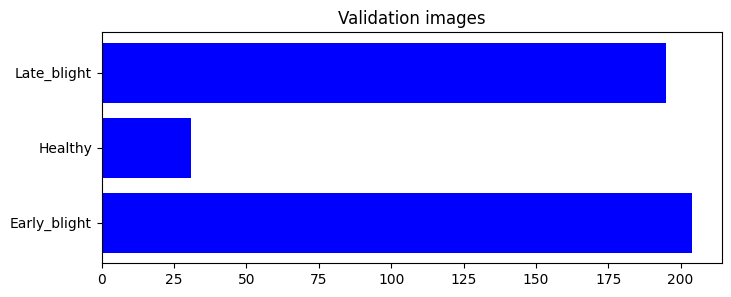

In [4]:
def plot_distribution(y, title):
    a = Counter(y)
    y = ['Early_blight', 'Healthy', 'Late_blight']
    
    x = [a[i] for i in range(3)]
    plt.figure(figsize=(8, 3))
    plt.barh(y, x, color='blue')
    plt.title(title)
    return plt.show()

y_train = np.concatenate([y for x, y in train_ds], axis=0)
y_val = np.concatenate([y for x, y in val_ds], axis=0)

plot_distribution(y_train, title="Train images")
plot_distribution(y_val, title = "Validation images")

2024-05-09 12:59:31.462215: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
2024-05-09 12:59:31.572504: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


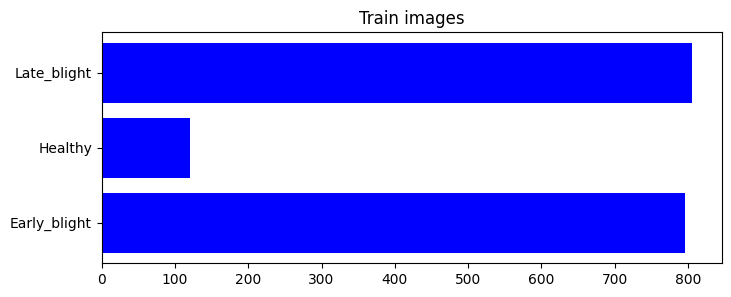

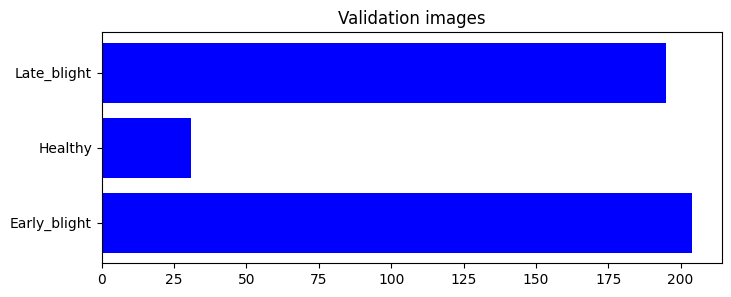

In [5]:
# Target distribution

y_train = np.concatenate([y for x, y in train_ds], axis=0)
y_val = np.concatenate([y for x, y in val_ds], axis=0)

plot_distribution(y_train, title="Train images")
plot_distribution(y_val, title = "Validation images")

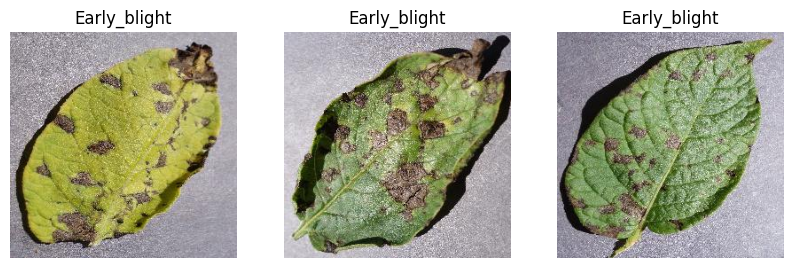

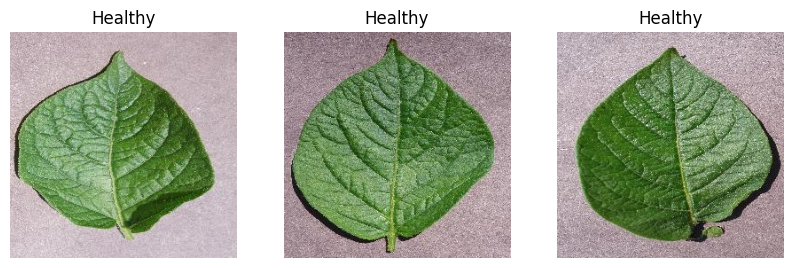

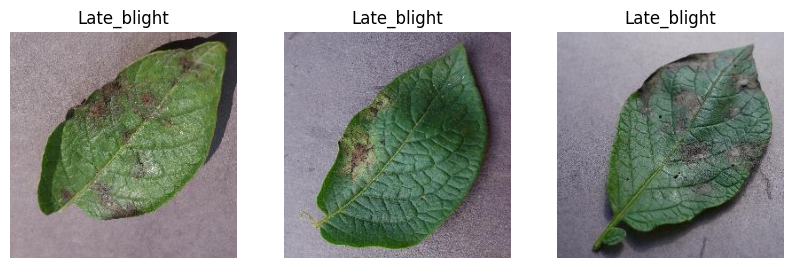

In [6]:
## Sample images
class_names = train_ds.class_names

for class_name in class_names:
    imgs = os.listdir(os.path.join(data_dir, class_name))[:3]
    plt.figure(figsize=(10, 10))
    for i, img in enumerate(imgs):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(plt.imread(os.path.join(data_dir, class_name, img)))
        plt.title(class_name)
        plt.axis('off')

# Model Training

In [7]:
# Configure the dataset for performance

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
num_classes = 3

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(img_height, img_width, 3)),
    tf.keras.layers.Rescaling(1./255),

    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Dense(num_classes, activation='softmax')

])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',
                                                      min_delta=0.0001,
                                                      patience=5)

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=20,
                    callbacks=[earlystop_callback])


Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 328ms/step - accuracy: 0.5298 - loss: 0.8878 - val_accuracy: 0.8372 - val_loss: 0.4818
Epoch 2/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 9s 317ms/step - accuracy: 0.8379 - loss: 0.4314 - val_accuracy: 0.8860 - val_loss: 0.3053
Epoch 3/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 315ms/step - accuracy: 0.8853 - loss: 0.3092 - val_accuracy: 0.8698 - val_loss: 0.3247
Epoch 4/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 384ms/step - accuracy: 0.8869 - loss: 0.2866 - val_accuracy: 0.9023 - val_loss: 0.2758
Epoch 5/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 304ms/step - accuracy: 0.9234 - loss: 0.1915 - val_accuracy: 0.9140 - val_loss: 0.2581
Epoch 6/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 310ms/step - accuracy: 0.9527 - loss: 0.1432 - val_accuracy: 0.9326 - val_loss: 0.2047
Epoch 7/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 293ms/step - accuracy: 0.9566 - loss: 0.1139 - val_accuracy: 0.9279 - val_loss: 0.2008
Epoch 8/20
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 291ms/step - accuracy: 0.9605 - loss: 0.1154 - val_accuracy: 0.9000 - va

# Model Evaluation

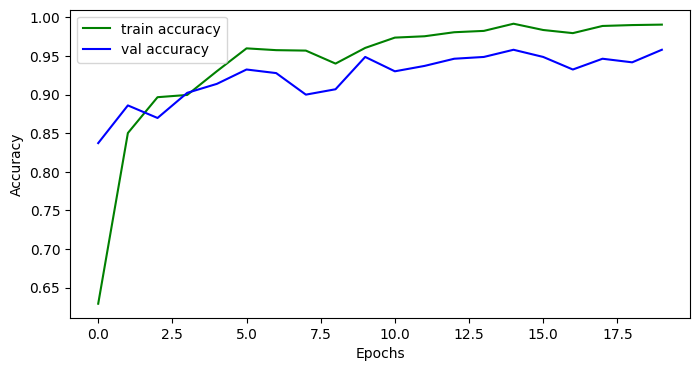

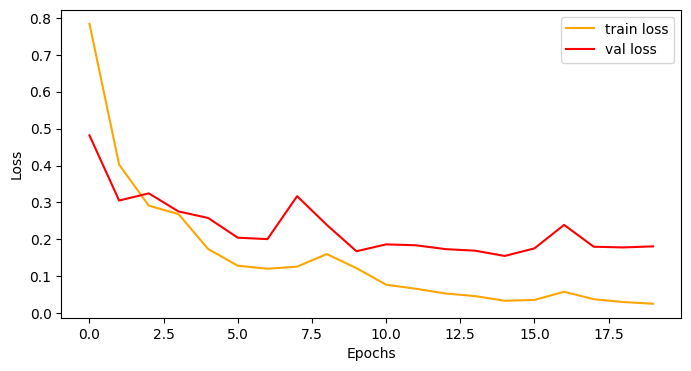

In [9]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
valid_loss = history.history['val_loss']
valid_acc = history.history['val_accuracy']

# Accuracy plots
plt.figure(figsize=(8, 4))
plt.plot(train_acc, color='green', linestyle='-', label='train accuracy')
plt.plot(valid_acc, color='blue', linestyle='-', label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# loss plots
plt.figure(figsize=(8, 4))
plt.plot(train_loss, color='orange', linestyle='-', label='train loss')
plt.plot(valid_loss, color='red', linestyle='-', label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
loss, acc = model.evaluate(val_ds, batch_size=batch_size)
print("validation accuracy :", round(acc, 2))
print("validation loss :", round(loss,2))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.9523 - loss: 0.2090
validation accuracy : 0.96
validation loss : 0.18


In [11]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for image_batch, label_batch in val_ds:   # use dataset.unbatch() with repeat
   # append true labels
   y_true.append(label_batch)
   # compute predictions
   preds = model.predict(image_batch)
   # append predicted labels
   y_pred.append(np.argmax(preds, axis = - 1))

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


2024-05-09 13:04:23.936743: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


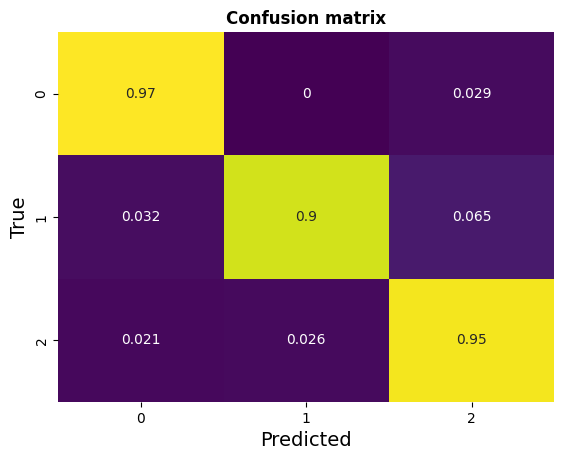

In [12]:
cm = confusion_matrix(correct_labels, predicted_labels, normalize='true')
sns.heatmap(cm, annot=True, cmap='viridis', cbar=None)
plt.title("Confusion matrix", fontweight='bold')
plt.ylabel("True", fontsize=14)
plt.xlabel("Predicted", fontsize=14)
plt.show()

In [13]:
print(classification_report(correct_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       204
           1       0.85      0.90      0.88        31
           2       0.96      0.95      0.96       195

    accuracy                           0.96       430
   macro avg       0.93      0.94      0.93       430
weighted avg       0.96      0.96      0.96       430



7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step


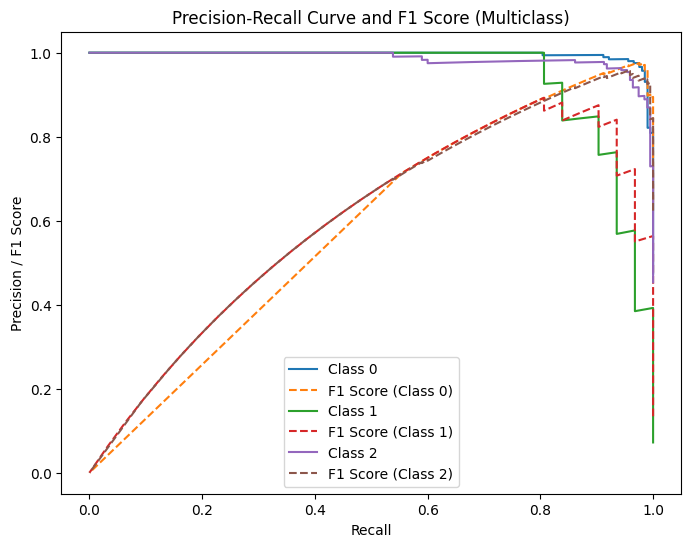

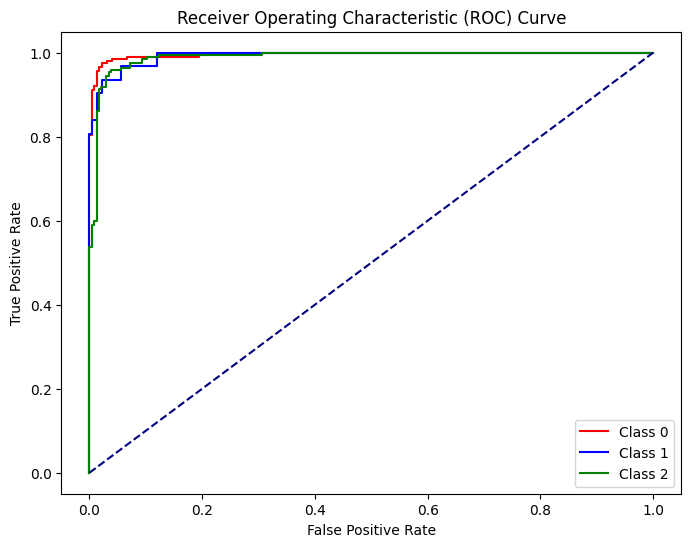

In [14]:
def plot_precision_recall_curve(y_true, y_scores):
    # Initialize lists to store precision, recall, and F1 score for each class
    precisions = []
    recalls = []
    f1_scores = []

    # Iterate over each class
    for class_idx in range(y_scores.shape[1]):
        # Get the true labels for the current class
        y_true_class = (y_true == class_idx).numpy().astype(int)
        # Get the predicted probabilities for the current class
        y_scores_class = y_scores[:, class_idx]
        # Compute precision, recall, and F1 score for the current class
        precision, recall, _ = precision_recall_curve(y_true_class, y_scores_class)
        f1 = 2 * (precision * recall) / (precision + recall)
        # Store precision, recall, and F1 score for the current class
        precisions.append(precision)
        recalls.append(recall)
        f1_scores.append(f1)

    # Plot Precision-Recall Curve and F1 Score for each class
    plt.figure(figsize=(8, 6))
    for class_idx in range(len(precisions)):
        plt.plot(recalls[class_idx], precisions[class_idx], label=f'Class {class_idx}')
        plt.plot(recalls[class_idx], f1_scores[class_idx], linestyle='--', label=f'F1 Score (Class {class_idx})')
    plt.xlabel('Recall')
    plt.ylabel('Precision / F1 Score')
    plt.title('Precision-Recall Curve and F1 Score (Multiclass)')
    plt.legend()
    plt.show()


def plot_roc_auc_curve(y_true, y_scores):
    # Convert y_true to one-hot encoded format
    y_true_one_hot = tf.one_hot(y_true, depth=y_scores.shape[1])
    
    # Initialize lists to store fpr and tpr for each class
    fpr = []
    tpr = []
    
    # Iterate over each class
    for class_idx in range(y_scores.shape[1]):
        # Get the true labels for the current class
        y_true_class = (y_true == class_idx).numpy().astype(int)
        
        # Get the predicted probabilities for the current class
        y_scores_class = y_scores[:, class_idx]
        
        # Calculate fpr and tpr for the current class
        class_fpr, class_tpr, _ = roc_curve(y_true_class, y_scores_class)
        
        # Append fpr and tpr to the lists
        fpr.append(class_fpr)
        tpr.append(class_tpr)
    
    # Plot ROC curve for each class
    plt.figure(figsize=(8, 6))
    colors = ['red', 'blue', 'green']  # Add more colors if needed
    for i in range(len(fpr)):
        plt.plot(fpr[i], tpr[i], color=colors[i], label=f'Class {i}')
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()



# Assuming y_true and y_scores are available
# y_true: True labels (binary or multiclass)
# y_scores: Predicted probabilities or scores (continuous)

# Convert one-hot encoded labels to one-dimensional array of true class labels
# Check the dimensionality of correct_labels
if correct_labels.ndim > 1:
    # Convert one-hot encoded labels to one-dimensional array of true class labels
    y_true = np.argmax(correct_labels, axis=1)
else:
    y_true = correct_labels

# Obtain predicted probabilities using the model
y_scores = model.predict(val_ds)

# Plot Precision-Recall Curve and F1 Score
plot_precision_recall_curve(y_true, y_scores)
# Plot ROC-AUC Curve
plot_roc_auc_curve(y_true, y_scores)


# Post Processing

In [40]:
# Save
model.save("../application/static/models/model_v4.h5")

In [15]:
def prediction(img):
    class_names = ['Early_blight', 'Healthy', 'Late_blight']

    my_image = load_img(img, target_size=(img_height, img_width))
    my_image = img_to_array(my_image)
    my_image = np.expand_dims(my_image, 0)

    out = np.round(model.predict(my_image)[0], 2)
    fig = plt.figure(figsize=(7, 4))
    plt.barh(class_names, out, color='lightgray',edgecolor='red', linewidth=1, height=0.5)

    for index, value in enumerate(out):
        plt.text(value/2 + 0.1, index, f"{100*value:.2f}%", fontweight='bold')

    plt.xticks([])
    plt.yticks([0, 1, 2], labels=class_names, fontweight='bold', fontsize=14)
    fig.savefig('pred_img.png', bbox_inches='tight')
    return plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


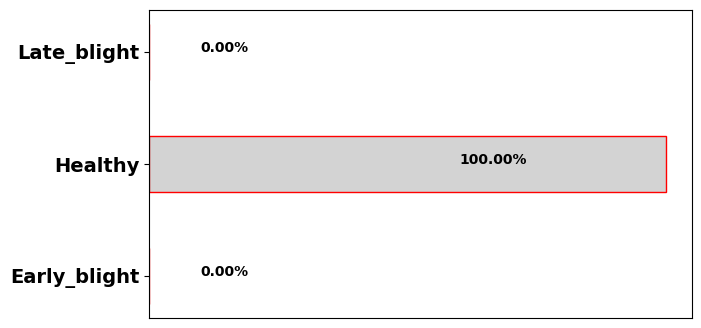

In [16]:
####### Prediction on single Image
img = '../data/Healthy/04481ca2-f94c-457e-b785-1ac05800b7ec___RS_HL 1930.JPG'
prediction(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


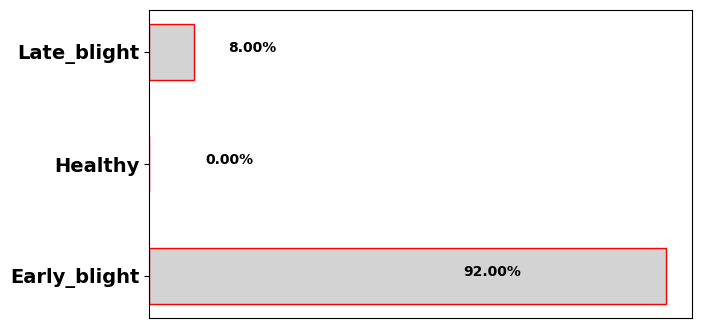

In [30]:
####### Prediction on single Image
img = '../data/Early_blight/0182e991-97f0-4805-a1f7-6e1b4306d518___RS_Early.B 7015.JPG'
prediction(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


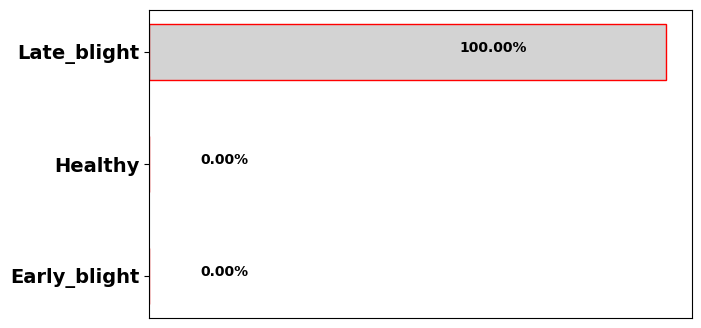

In [17]:
####### Prediction on single Image
img = '../data/Late_blight/01270f5c-a44b-4da7-9398-289088c197ab___RS_LB 2517.JPG'
prediction(img)